In [6]:
import warnings
import pandas as pd
from os.path import isfile, join
from os import listdir
import os
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')


In [7]:
def load_images_from_folder(folder):
    train_data = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        img = ~img
        if img is not None:
            ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

            ctrs, ret = cv2.findContours(
                thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w = int(28)
            h = int(28)
            maxi = 0
            for c in cnt:
                x, y, w, h = cv2.boundingRect(c)
                maxi = max(w*h, maxi)
                if maxi == w*h:
                    x_max = x
                    y_max = y
                    w_max = w
                    h_max = h
            im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop, (28, 28))
            im_resize = np.reshape(im_resize, (784, 1))
            train_data.append(im_resize)
    return train_data


In [8]:
data = []


In [9]:
# Assign '-' = 10
data = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\!\\")
len(data)
for i in range(0, len(data)):
    data[i] = np.append(data[i], ['10'])

print(len(data))


1300


In [10]:
# Assign + = 11
data11 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\+\\")

for i in range(0, len(data11)):
    data11[i] = np.append(data11[i], ['11'])
data = np.concatenate((data, data11))
print(len(data))


26412


In [11]:
data0 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\0\\")

for i in range(0, len(data0)):
    data0[i] = np.append(data0[i], ['0'])
data = np.concatenate((data, data0))
print(len(data))


33326


In [12]:
data1 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\1\\")

for i in range(0, len(data1)):
    data1[i] = np.append(data1[i], ['1'])
data = np.concatenate((data, data1))
print(len(data))


59846


In [13]:
data2 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\2\\")

for i in range(0, len(data2)):
    data2[i] = np.append(data2[i], ['2'])
data = np.concatenate((data, data2))
print(len(data))


85987


In [14]:
data3 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\3\\")

for i in range(0, len(data3)):
    data3[i] = np.append(data3[i], ['3'])
data = np.concatenate((data, data3))
print(len(data))


96896


In [15]:
data4 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\4\\")

for i in range(0, len(data4)):
    data4[i] = np.append(data4[i], ['4'])
data = np.concatenate((data, data4))
print(len(data))


104292


In [16]:
data5 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\5\\")

for i in range(0, len(data5)):
    data5[i] = np.append(data5[i], ['5'])
data = np.concatenate((data, data5))
print(len(data))


107837


In [17]:
data6 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\6\\")

for i in range(0, len(data6)):
    data6[i] = np.append(data6[i], ['6'])
data = np.concatenate((data, data6))
print(len(data))


110955


In [18]:
data7 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\7\\")

for i in range(0, len(data7)):
    data7[i] = np.append(data7[i], ['7'])
data = np.concatenate((data, data7))
print(len(data))


113864


In [19]:
data8 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\8\\")

for i in range(0, len(data8)):
    data8[i] = np.append(data8[i], ['8'])
data = np.concatenate((data, data8))
print(len(data))


116932


In [20]:
data9 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\9\\")

for i in range(0, len(data9)):
    data9[i] = np.append(data9[i], ['9'])
data = np.concatenate((data, data9))
print(len(data))


120669


In [21]:
data12 = load_images_from_folder(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\data\\extracted_images\\times\\")

for i in range(0, len(data12)):
    data12[i] = np.append(data12[i], ['12'])
data = np.concatenate((data, data12))
print(len(data))


123920


In [22]:
df = pd.DataFrame(data, index=None)
df.to_csv('train_final.csv', index=False)


In [23]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle


In [24]:
df_train = pd.read_csv('train_final.csv', index_col=False)
labels = df_train[['784']]


In [25]:
df_train.drop(df_train.columns[[784]], axis=1, inplace=True)
df_train.head(10)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,36,146,255,146,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,32,150,241,123,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,64,191,191,64,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,132,241,105,...,0,0,0,0,0,0,0,0,0,0
6,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from keras import backend as K
from keras.utils import np_utils
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Input, Dense
from keras import optimizers
from keras.layers import *
from keras.models import Model
import keras
np.random.seed(1212)
K.image_data_format()


'channels_last'

In [27]:
labels = np.array(labels)


In [28]:
from keras.utils.np_utils import to_categorical
cat = to_categorical(labels, num_classes=13)


In [29]:
print(cat[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [30]:
df_train.head(10)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,36,146,255,146,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,32,150,241,123,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,64,191,191,64,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,132,241,105,...,0,0,0,0,0,0,0,0,0,0
6,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_train.shape


(123920, 784)

In [32]:
temp = df_train.to_numpy()


In [33]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)


In [34]:
temp.shape[0]


123920

In [35]:
X_train.shape


(123920, 28, 28, 1)

In [36]:
l = []
for i in range(50621):
    l.append(np.array(df_train[i:i+1]).reshape(1, 28, 28))


In [37]:
np.random.seed(7)


In [38]:
X_train.shape


(123920, 28, 28, 1)

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1),
          activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))


In [40]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [41]:
from keras.models import model_from_json


In [42]:
model.fit(X_train, cat, epochs=10, batch_size=200, shuffle=True, verbose=1)


Epoch 1/10
620/620 [==============================] - 40s 61ms/step - loss: 0.5026 - accuracy: 0.8782
Epoch 2/10
620/620 [==============================] - 37s 60ms/step - loss: 0.0958 - accuracy: 0.9719
Epoch 3/10
620/620 [==============================] - 37s 60ms/step - loss: 0.0571 - accuracy: 0.9827
Epoch 4/10
620/620 [==============================] - 41s 66ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 5/10
620/620 [==============================] - 40s 64ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 6/10
620/620 [==============================] - 40s 65ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 7/10
620/620 [==============================] - 40s 65ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 8/10
620/620 [==============================] - 40s 65ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 9/10
620/620 [==============================] - 41s 65ms/step - loss: 0.0181 - accuracy: 0.9945
Epoch 10/10
620/620 [==============================] - 39s 63ms/step - loss: 0.016

In [43]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")


In [44]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json


In [45]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")


In [104]:
import cv2
import numpy as np
img = cv2.imread(
    "C:\\Users\\dawns\\OneDrive\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\equ4.jpg", cv2.IMREAD_GRAYSCALE)
img


array([[159, 159, 160, ..., 167, 167, 166],
       [159, 159, 160, ..., 167, 167, 166],
       [159, 159, 160, ..., 167, 167, 167],
       ...,
       [166, 166, 166, ..., 161, 161, 161],
       [166, 166, 166, ..., 161, 161, 161],
       [166, 166, 166, ..., 161, 161, 161]], dtype=uint8)

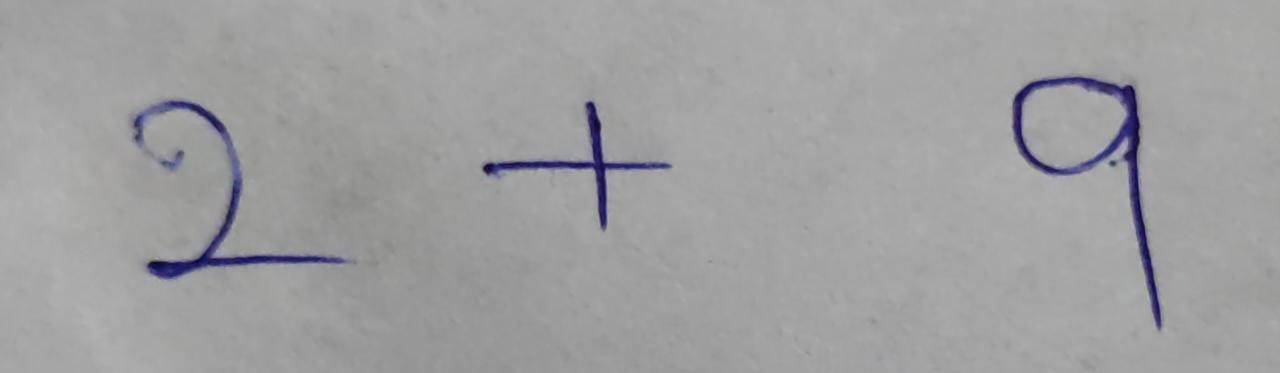

In [105]:
from IPython import display
display.Image(
    "C:\\Users\\dawns\\OneDrive\\Desktop\\Let's Grow More Projects\\09.Handwritten Equation Solver\\equ4.jpg", width=360)


In [106]:
if img is not None:
    # images.append(img)
    img = ~img
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    ctrs, ret = cv2.findContours(
        thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28)
    h = int(28)
    train_data = []
    print(len(cnt))
    rects = []
    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)
    print(rects)
    bool_rect = []
    for r in rects:
        l = []
        for rec in rects:
            flag = 0
            if rec != r:
                if r[0] < (rec[0]+rec[2]+10) and rec[0] < (r[0]+r[2]+10) and r[1] < (rec[1]+rec[3]+10) and rec[1] < (r[1]+r[3]+10):
                    flag = 1
                l.append(flag)
            if rec == r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect = []
    for i in range(0, len(cnt)):
        for j in range(0, len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2]*rects[i][3]
                area2 = rects[j][2]*rects[j][3]
                if (area1 == min(area1, area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect))
    final_rect = [i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h+10, x:x+w+10]

        im_resize = cv2.resize(im_crop, (28, 28))

        im_resize = np.reshape(im_resize, (28, 28, 1))
        train_data.append(im_resize)


8
[[132, 100, 220, 180], [160, 150, 24, 21], [353, 261, 3, 3], [482, 101, 190, 130], [1012, 76, 150, 255], [1021, 83, 107, 86], [1109, 160, 8, 7], [1139, 112, 1, 1]]
[[0, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0]]
6
[[132, 100, 220, 180], [482, 101, 190, 130], [1012, 76, 150, 255]]


In [107]:
s = ''
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1, 28, 28, 1)
    result = np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if (result[0] == 10):
        s = s+'-'
    elif (result[0] == 11):
        s = s+'+'
    elif (result[0] == 12):
        s = s+'*'
    elif (result[0] == 0):
        s = s+'0'
    elif (result[0] == 1):
        s = s+'1'
    elif (result[0] == 2):
        s = s+'2'
    elif (result[0] == 3):
        s = s+'3'
    elif (result[0] == 4):
        s = s+'4'
    elif (result[0] == 5):
        s = s+'5'
    elif (result[0] == 6):
        s = s+'6'
    elif (result[0] == 7):
        s = s+'7'
    elif (result[0] == 8):
        s = s+'8'
    elif (result[0] == 9):
        s = s+'9'

print(s)


1/1 [==============================] - 0s 23ms/step
2+9


In [108]:
eval(s)


11